<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../images/opendata-top-transblack.png" style="width:40%"></a>
</CENTER>

# A simple introduction to data analysis in ATLAS: Level 4
Now you know how to apply cuts and fill histograms for two separate datasets. In **Level 4** we will learn to **reconstruct the mass of a parent particle** using the particles it decayed into and that were measured by the detector. This level steps it up: you figure out yourself how to compute the mass!

First we import ROOT to read the files in the _.root_ data format.
In order to activate the interactive visualisation of the histogram that is later created we can use the JSROOT magic activated in the second line.

In [14]:
import ROOT
import math
## %jsroot on

Next we open two data file: one represents the "signal", the other the "background".

In [15]:
signal_file = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root")
background_file = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105985.WW.root")
#f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root")
print "Opened signal file with name ", signal_file.GetName()
print "Opened background file with name ", background_file.GetName()

Opened signal file with name  http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root
Opened background file with name  http://opendata.atlas.cern/release/samples/MC/mc_105985.WW.root


After the data is opened we create the canvas on which we we draw the final histogram.

In [16]:
canvas = ROOT.TCanvas("Canvas","my canvas",800,600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


Now we define a "signal" tree and a "background" tree.

In [17]:
signal = signal_file.Get("mini")
background = background_file.Get("mini")

Now we define histograms in which to fill the reconstructed mass: one for signal and one for background events. The mass has units of GeV.

In [18]:
signal_hist_mass = ROOT.TH1F("signal mass","reconstructed mass [MeV]",30*1000,0,150*1000)
background_hist_mass = ROOT.TH1F("background mass","reconstructed mass [MeV]}",30*1000,0,150*1000)

Now we loop through the events in each dataset and apply basic cuts. Remember, if you want to loop through _all_ events, then _comment out_ the line that contains the word **break** in it by inserting a hash (#) at the beginning of that line.
The cuts are again tailored to select Z->ee or Z->mumu events. That is, we want:
1. At least 2 leptons in the event.
2. The first 2 leptons are of the same family.
3. The first 2 leptons have opposite charges.
We start with signal events.

This time we want to calculate the mass of the parent particle based on the two most energetic leptons in the event and fill this value into the histogram.

It is up to you to find the formula that allows you to calculate the mass. Hints:
* Remember the only variables you have available in your file are {http://opendata.atlas.cern/books/current/openatlasdatatools/_book/variable_names.html}.
* Children particles can be assumed to be massless.

In [19]:
#signal
print "number of total signal events to loop over: ", signal.GetEntries()

count = 0
for i in range(signal.GetEntries()):
    if i >= 1000000: break # use this line to test the loop: this line will make the loop run only over the first 1 million events.
    if i%1000000 == 0: print "at event number ", i # this is so we know where we are as the loop can take a while to execute.
    signal.GetEntry(i)
    count += 1
    
    #1st cut
    if signal.lep_n >= 2:
        # 2nd cut
        if signal.lep_type[0] == signal.lep_type[1]:
            #3rd cut
            if not signal.lep_charge[0] == signal.lep_charge[1]:
                # now it is up to you to calculate the mass of the parent particle the two leptons might have come from.
                mass = 0
                signal_hist_mass.Fill(mass)
    
print "Done!"
print "looped over ", count, " signal events."

number of total signal events to loop over:  7500000
at event number  0
Done!
looped over  1000000  signal events.


In [20]:
#background
print "number of total background events to loop over: ", background.GetEntries()

count = 0
for i in range(background.GetEntries()):
    if i >= 1000000: break # use this line to test the loop: this line will make the loop run only over the first 1 million events.
    if i%1000000 == 0: print "at event number ", i # this is so we know where we are as the loop can take a while to execute.
    background.GetEntry(i)
    count += 1
    
    #1st cut
    if background.lep_n >= 2:
        # 2nd cut
        if background.lep_type[0] == background.lep_type[1]:
            #3rd cut
            if not background.lep_charge[0] == background.lep_charge[1]:
                # now it is up to you to calculate the mass of the parent particle the two leptons might have come from.
                mass = 0
                background_hist_mass.Fill(mass)
    
print "Done!"
print "looped over ", count, " background events."

number of total background events to loop over:  500000
at event number  0
Done!
looped over  500000  background events.


Now we colour and draw the histograms.
If the calculations have been done right, then the histogram should _peak_ around the mass of the Z boson in the signal events, that is, around 91 GeV. 

In [21]:
#signal is red
signal_hist_mass.SetLineColor(ROOT.kRed)
signal_hist_mass.SetLineWidth(2) # making line thicker so we can see it better
signal_hist_mass.Draw()
#background is blue
background_hist_mass.SetLineColor(ROOT.kBlue)
background_hist_mass.SetLineWidth(2) # making line thicker so we can see it better
background_hist_mass.Draw("SAME")

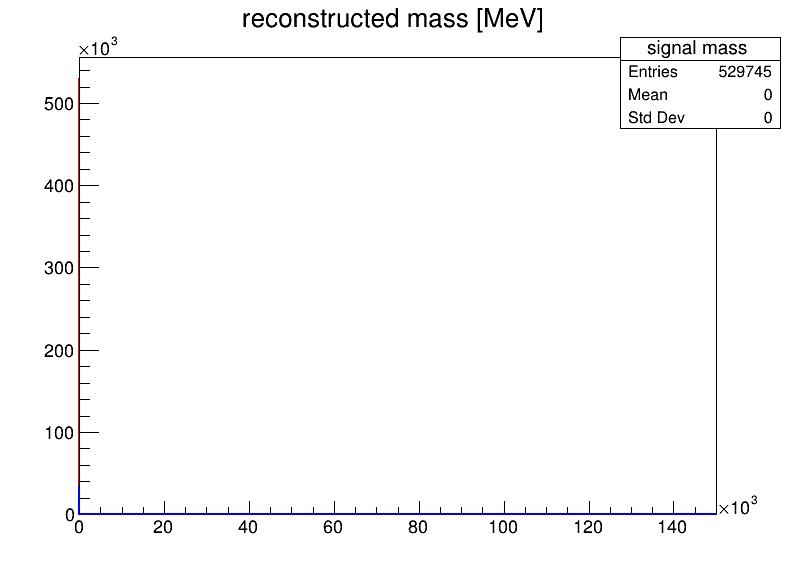

In [22]:
canvas.Draw()

Here, again, we scale the histograms to get fractional entries.

In [23]:
#signal
scale = signal_hist_mass.Integral()
signal_hist_mass.Scale(1/scale)
#background
scale = background_hist_mass.Integral()
background_hist_mass.Scale(1/scale)

In [24]:
#signal
signal_hist_mass.Draw()
#background
background_hist_mass.Draw("SAME")

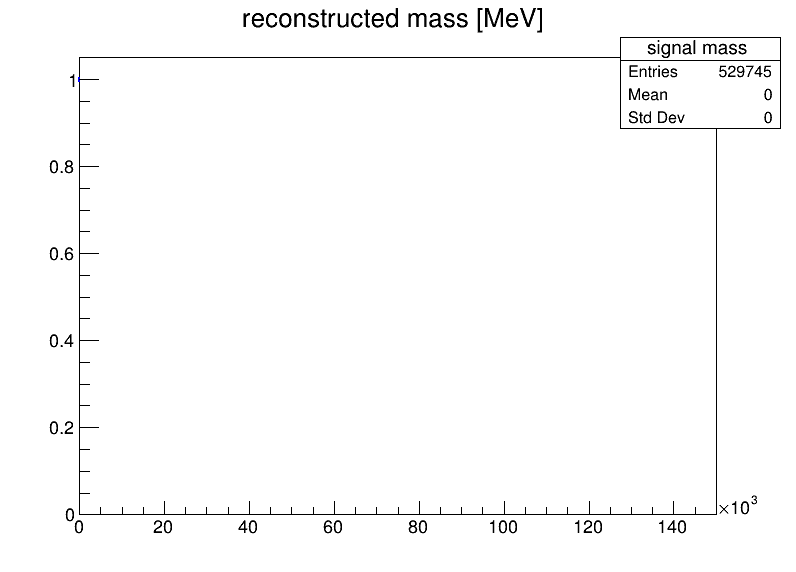

In [25]:
canvas.Draw()